# TSF Task 6: Decision Tree Algorithm

# Author: Spriha Ghosh

## Problem: Create the Decision Tree classifier and visualize it graphically.

### Description: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [30]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Load Dataset

In [31]:
dataset = pd.read_csv("Iris.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [32]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
print('Shape:', dataset.shape)

Shape: (150, 6)


In [35]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

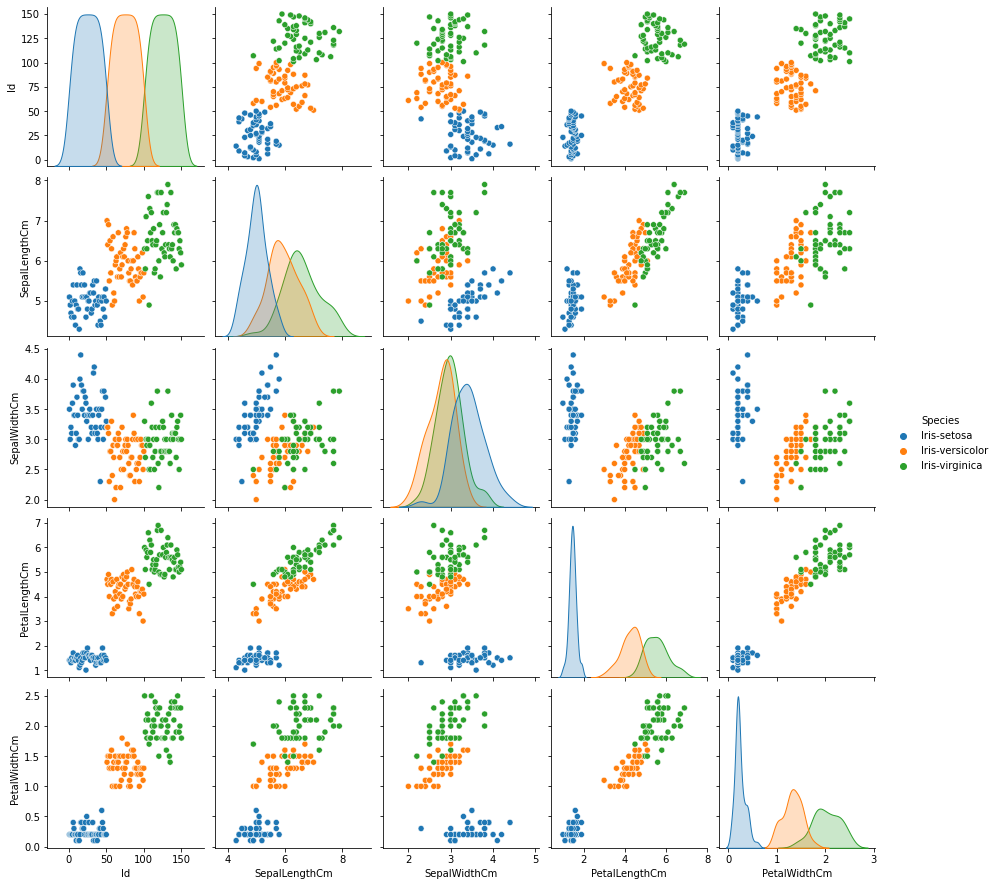

In [38]:
sb.pairplot(dataset,hue='Species')

<AxesSubplot:>

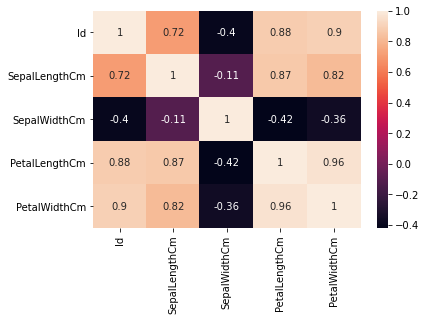

In [40]:
corr = dataset.corr(method ='pearson')
sb.heatmap(corr, annot = True)

# Encode label

In [41]:
LE = LabelEncoder()

iris_dataset_LE = dataset
iris_dataset_LE.Species = LE.fit_transform(iris_dataset_LE.Species)

for col in iris_dataset_LE.columns:
    print(col,':',len(iris_dataset_LE[col].unique()),'labels')

Id : 150 labels
SepalLengthCm : 35 labels
SepalWidthCm : 23 labels
PetalLengthCm : 43 labels
PetalWidthCm : 22 labels
Species : 3 labels


In [42]:
# Independent variables 
X=dataset.iloc[:,0:4]

# Dependent variable
Y=dataset['Species']

print(X.shape,Y.shape)

(150, 4) (150,)


# Split the data into Training & Test Set

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# Feature scale the matrix of features

In [44]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()                 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Build the Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")

# Train the model on the training set

In [46]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Visualize the Model Graphically

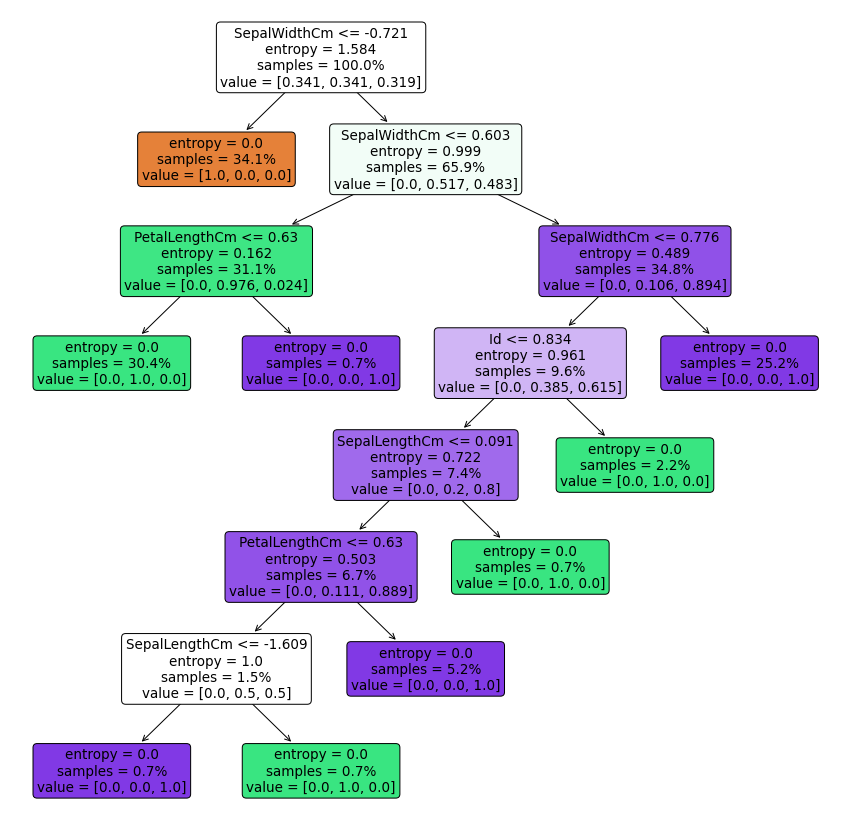

In [47]:
cols=list(X.columns.values)
plt.figure(figsize=(15,15))
tree.plot_tree(classifier,feature_names=cols,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

# Predictions 

In [48]:
y_pred_train = classifier.predict(x_train)  #Training Set
print(y_pred_train)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' '

In [49]:
y_pred_test = classifier.predict(x_test)    #Test Set
print(y_pred_test)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica']


# Evaluate The Model

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred_test)
ac = accuracy_score(y_test, y_pred_test)
print(f"Confusion Matrix :\n {cm}")
print(f"Accuracy : {ac*100}%")

Confusion Matrix :
 [[4 0 0]
 [0 3 1]
 [0 0 7]]
Accuracy : 93.33333333333333%
